In [31]:
import geopandas as gpd
import psycopg2 as ps2
import contextily as cx
import pandas as pd

In [3]:
conn = ps2.connect(
    host="localhost",
    database="collision_aid",
    user="postgres",
    password="123456789")

In [8]:
query='select * from shops_shop'
shops = gpd.read_postgis(query, conn, geom_col='geom_m')

C:\Users\USER\miniconda3\envs\pygis\lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


In [12]:
query='select * from shops_zipcodes'
zipcodes = gpd.read_postgis(query, conn, geom_col='geom')

In [13]:

zipcodes.columns

Index(['id', 'ZIP', 'lat', 'lon', 'geom'], dtype='object')

In [65]:
code = '90241'
code = '73179'
buff_size = 2 * 1609.34 #miles to metres
filter = zipcodes[zipcodes['ZIP'] == code]
filter['buff'] = filter.buffer(buff_size)

filter = filter.set_geometry('buff').to_crs(epsg=26911)

C:\Users\USER\miniconda3\envs\pygis\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\USER\miniconda3\envs\pygis\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


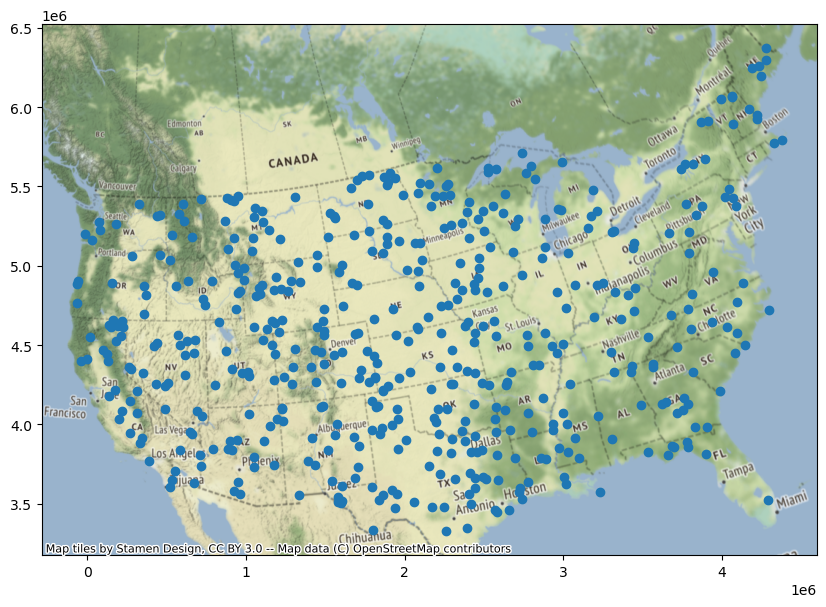

In [64]:
ax = filter.plot(figsize=(10,10), alpha=0.5, color='red', edgecolor='k')
shops.plot(ax=ax)
cx.add_basemap(ax, crs=filter.crs)

In [66]:
shops[shops.within(filter.geom)]

C:\Users\USER\miniconda3\envs\pygis\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\USER\miniconda3\envs\pygis\lib\site-packages\geopandas\geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,id,name,lat,lon,geom,geom_m


In [67]:
points_within = gpd.sjoin(shops, filter, how='inner', predicate='within')

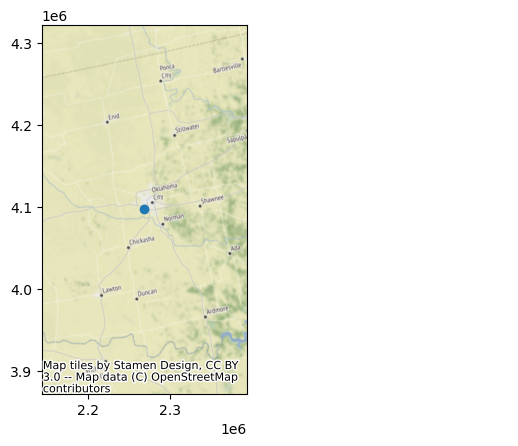

In [70]:
ax = points_within.plot()
cx.add_basemap(ax, crs=points_within.crs)